<a href="https://colab.research.google.com/github/jeangomes/bootcamp-alura-ds/blob/main/Bootcamp_Datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
dados = pd.read_csv("/content/A205804189_28_143_208.csv", encoding="ISO-8859-1", skiprows=3, sep=";",skipfooter=12, thousands=".", decimal=",", engine='python')
#dados.head() # pega itens do começo
#dados.tail() # pega itens do final

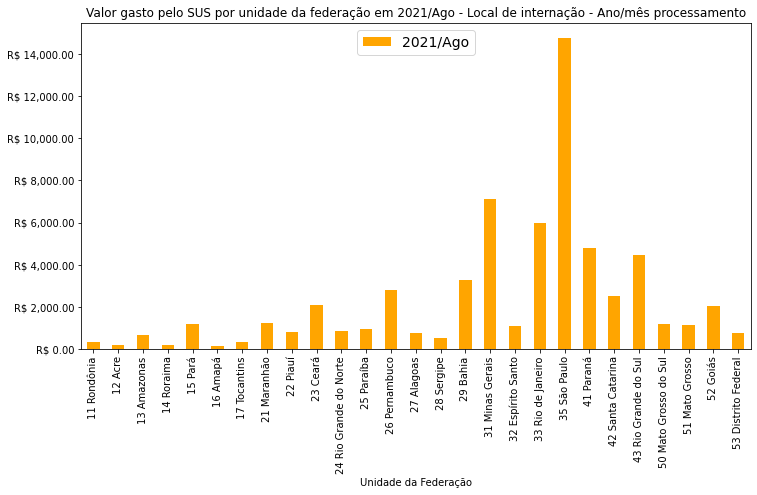

In [4]:
# Aula 1
pd.options.display.float_format = "{:.2f}".format # Formatando valor
#dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(start=3) # Removendo número do nome das UF
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x="Unidade da Federação", y="2021/Ago", kind="bar", figsize=(12,6), color="orange")
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
ax.legend(loc='upper center',fontsize=14)
plt.title("Valor gasto pelo SUS por unidade da federação em 2021/Ago - Local de internação - Ano/mês processamento")
plt.show()

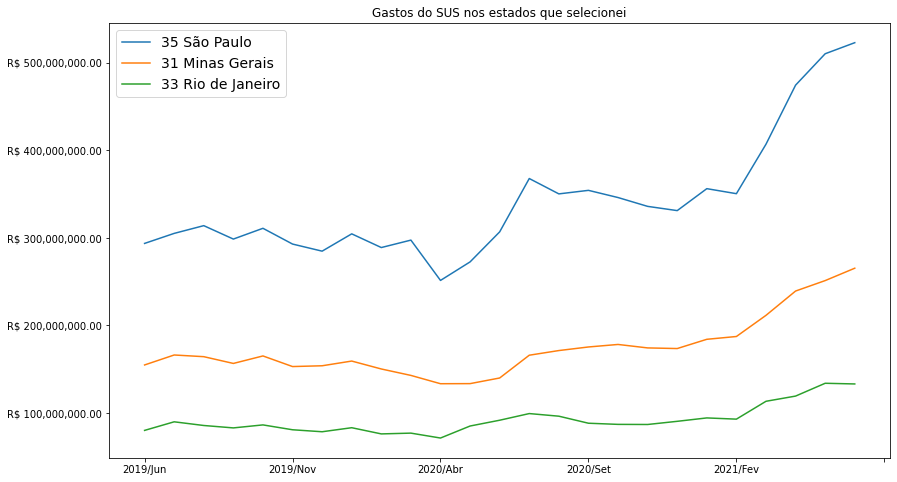

In [ ]:
# Aula 2
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1)
usaveisUfSelecionadas = usaveis.loc[["35 São Paulo","31 Minas Gerais","33 Rio de Janeiro"], '2019/Jun':'2021/Jun'] #  -> poderia limitar o periodo de tempo
ax = usaveisUfSelecionadas.T.plot(figsize=(14,8))
ax.legend(loc='upper left',fontsize=14)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
#plt.axhline(y=200000000, color='r', linestyle='--')
plt.title("Gastos do SUS nos estados que selecionei")
plt.show()

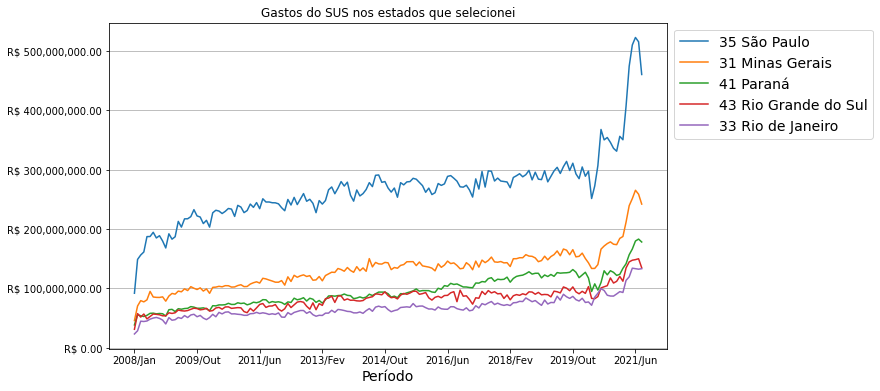

In [ ]:
# Aula 3
#usaveis[:5].T.plot(figsize=(10,6))
#import numpy as np
#np.random.seed(687942)
#usaveis.sample(n=3)

usaveis["Total"] = usaveis.sum(axis=1)
ordenado_por_total = usaveis.sort_values("Total", ascending=False) 
ordenado_por_total = ordenado_por_total.drop(["Total"], axis=1)


colunas_interessadas = ordenado_por_total.columns#[6:-20]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
chart = ordenado_por_total.head(5).T.plot(figsize=(10,6))
chart.legend(loc='upper left',fontsize=14, bbox_to_anchor=(1,1))
chart.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
chart.set_xlabel("Período", fontsize=14)
plt.title("Gastos do SUS nos estados que selecionei")
chart.yaxis.grid()
#plt.style.use('ggplot')
plt.show()

#plt.grid(b=True, axis='x',ls="-.")


In [ ]:
# regioes = []
# for index in usaveis.index:
#   if index[0] == '1':
#     regioes.append('Norte')
#   elif index[0] == '2':
#     regioes.append('Nordeste')
#   elif index[0] == '3':
#     regioes.append('Sudeste') 
#   elif index[0] == '4':
#     regioes.append('Sul')
#   elif index[0] == '5':
#     regioes.append('Centro-Oeste') 
#   else:
#     regioes.append('Erro')
# usaveis['Região'] = regioes

In [ ]:
ordenado_por_total = ordenado_por_total / 1000000
meses_filtrados = ordenado_por_total.columns[47:150] 

(0.0, 350.0)

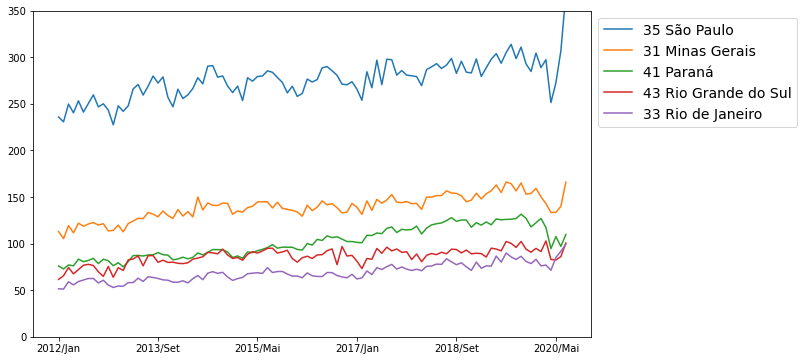

In [ ]:
# aula 4
ordenado_por_total[meses_filtrados].head(5).T.plot(figsize=(10,6))
plt.legend(loc='upper left',fontsize=14, bbox_to_anchor=(1,1))
plt.ylim(0,350)


In [ ]:
# aula 5
mes_mais_recente = ordenado_por_total.columns[-1]

In [ ]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente / gastos_do_mais_recente.loc["31 Minas Gerais"]
#gastos_do_mais_recente.plot(kind='bar')

In [ ]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc["31 Minas Gerais"]) # Desafio 2

Unidade da Federação
35 São Paulo             1.90
31 Minas Gerais          1.00
41 Paraná                0.74
43 Rio Grande do Sul     0.56
33 Rio de Janeiro        0.55
29 Bahia                 0.45
26 Pernambuco            0.42
42 Santa Catarina        0.42
23 Ceará                 0.31
52 Goiás                 0.29
32 Espírito Santo        0.18
15 Pará                  0.18
21 Maranhão              0.17
51 Mato Grosso           0.16
50 Mato Grosso do Sul    0.15
24 Rio Grande do Norte   0.13
25 Paraíba               0.12
22 Piauí                 0.11
53 Distrito Federal      0.11
27 Alagoas               0.10
13 Amazonas              0.09
28 Sergipe               0.06
11 Rondônia              0.05
17 Tocantins             0.04
16 Amapá                 0.02
12 Acre                  0.02
14 Roraima               0.02
Name: 2021/Ago, dtype: float64

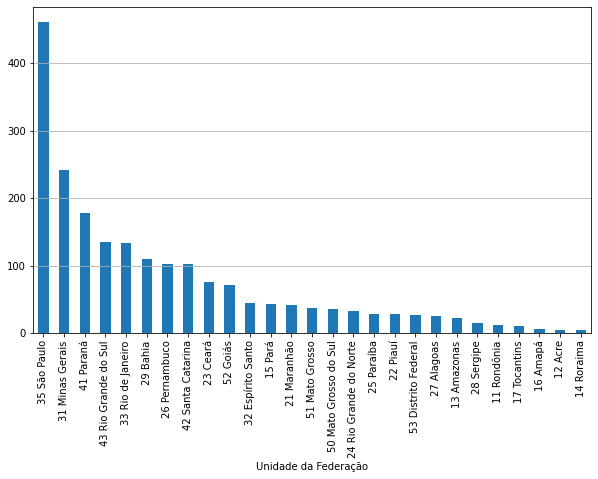

In [ ]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
chart = gastos_do_mais_recente.plot(kind="bar",figsize=(10,6))
chart.yaxis.grid() # Desafio 1
plt.show()